## Zahrea's Exploring Data Analysis for Dating Profiles on Loovoo

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data 
dating_stats = pd.read_csv("/Users/zahrea/Desktop/dating-profile-analysis/data/lovoo_v3_users_api-results/lovoo_v3_users_api-results.csv")

First we import the data needed to analyze from the CSV file. This dating is from the Loovoo Dating Profiles and contains information about the users.

## Data Inspection

In [4]:
#the first 5 rows of the data to make sure it displays as it should 
dating_stats.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


 To make sure the data is being displayed correctly, I previewed the first 5 rows of the data in the CSV file.

In [5]:
#describes the numeric columns
dating_stats.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,distance,isFlirtstar,isHighlighted,...,isNew,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3946.000000,3992.000000,3992.000000,...,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3.991000e+03,3992.000000,46.0,2.0
mean,21.991483,0.569409,4.786573,3705.467184,156.599699,2.335421,0.125501,207.230005,0.011774,0.011774,...,0.238727,0.585421,0.022796,1.109719,0.219940,0.960671,1.428921e+09,0.003758,1.0,1.0
std,1.959481,0.326066,4.420238,6845.038330,377.650691,12.235699,1.238945,196.594017,0.107879,0.107879,...,0.426359,0.492711,0.149270,0.582451,0.414258,0.194400,8.227151e+05,0.061191,0.0,0.0
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426592e+09,0.000000,1.0,1.0
25%,20.000000,0.310000,2.000000,383.000000,11.000000,0.000000,0.000000,83.875000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.428332e+09,0.000000,1.0,1.0
50%,22.000000,0.620000,4.000000,1222.000000,44.000000,0.000000,0.000000,172.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.428400e+09,0.000000,1.0,1.0
75%,24.000000,0.850000,6.000000,4063.250000,141.000000,0.000000,0.000000,317.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.429992e+09,0.000000,1.0,1.0
max,28.000000,1.000000,30.000000,164425.000000,9288.000000,241.000000,43.000000,6918.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.430647e+09,1.000000,1.0,1.0


# EDA
## Q1: What is the demographic profile of an average dating app user in this dataset?
The demographic can be described as the gender, age, country of a user on the dating app. To find the average demographic, we analyzed some of the columns to get insight of the type of users in this dataset.  

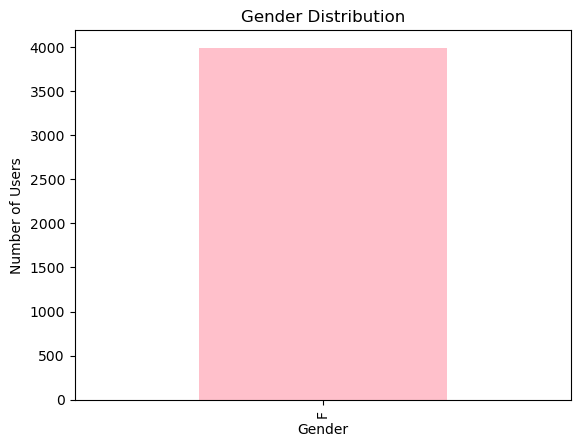

In [6]:
# Finding the gender
dating_stats['gender'].value_counts().plot(kind='bar', color='pink')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()


### Gender Demographic Distribution for Dating Profiles
The data revealed that all of the users in this dataset were **female**. This could be for a number of reasons but based on the details from the authors of this dataset, it was explained that the data was gathered from "matches" that were available from **two male accounts**. We can conclude that these two male accounts were **heterosexual** which explains why only **females** were in this demographic. 

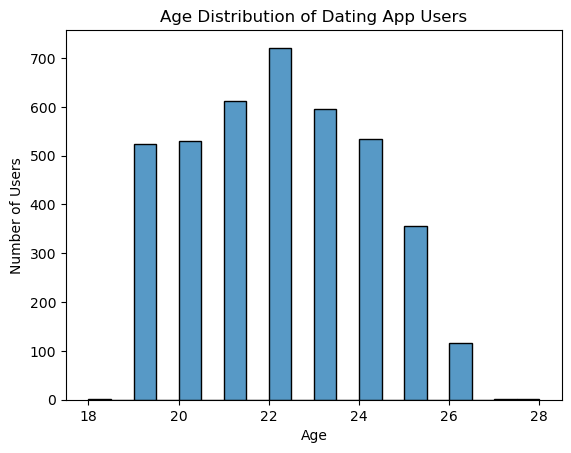

In [18]:
# Finding the average age
dating_stats['age'].describe()
sns.histplot(dating_stats['age'], bins=20)
plt.title('Age Distribution of Dating App Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


### Age Demographic Distribution for Dating Profiles
Another observation for this demographic was the average age. The average age, based on the chart above explains that majority of the users, which was about *700* were **22 years old**.

<Axes: title={'center': 'Top 10 Countries'}, ylabel='country'>

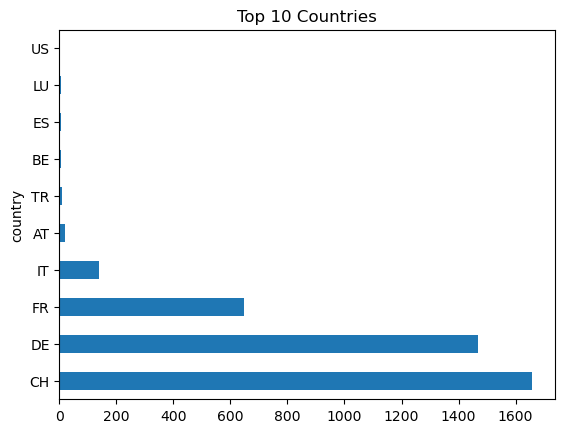

In [7]:
# Top countries users are from 
dating_stats['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries')

### Country Demographic Distribution for Dating Profiles
Based on the results in the graph shown above, it was concluded that the users from this dataset were from specific countries with **China** being the main country of origin where over **1600 users** were from, **Denmark followed behind with 1400 users** and **France with 600**. Once again, this could be due to the fact that since this dataset was obtained from two male users who matched with these accounts, it could be that these locations were set as their preference. 

## Q2: What differentiates the top 5 most visited profiles from the bottom 5 least visited profiles ?

We explored this question by looking at the most visited profiles and least visited profiles and then narrow it down to the top 5 and bottom 5 by using the *head* and *tail* function. From there, further analysis could be done on the columns and the data to find differences and make conclusions and find patterns in users dating style. 

Top 5 Most Visited Profiles
     age genderLooking country  counts_pictures
157   23             M      DE               16
240   23             M      CH                4
61    22             M      CH                3
47    25             M      DE                4
91    21             M      CH               21

Bottom 5 Least Visited Profiles
      age genderLooking country  counts_pictures
3416   22             M      DE                0
3493   21          none      IT                7
3494   21             M      DE                0
3496   24             M      DE                0
3517   24             M      FR                4


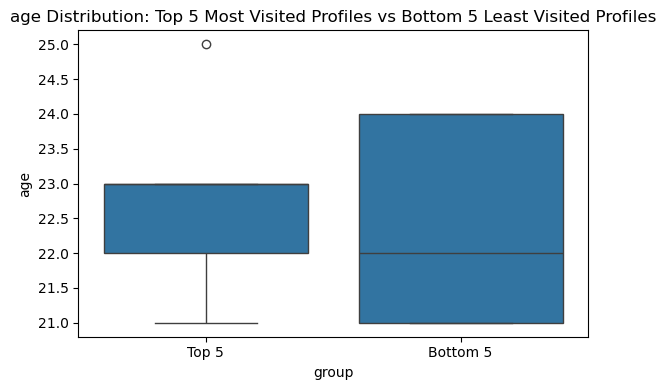

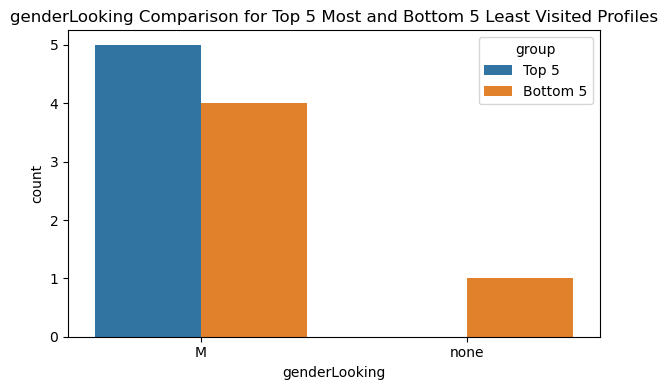

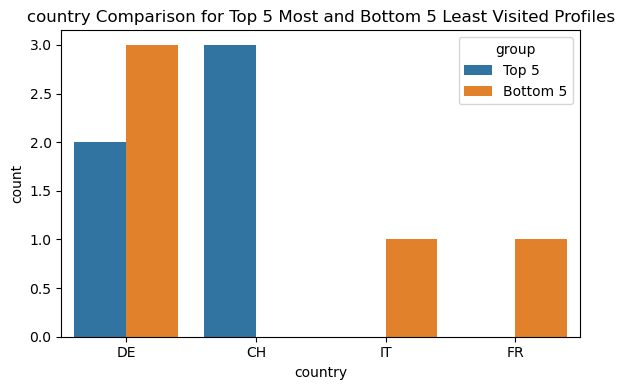

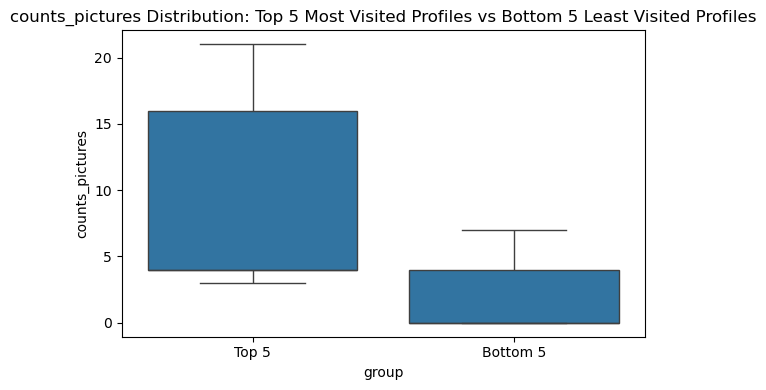

In [8]:
# Sort by profile visit count
sorted_stats = dating_stats.sort_values(by='counts_profileVisits', ascending=False)

# Extract top and bottom 5
top5 = sorted_stats.head(5).copy()
bottom5 = sorted_stats.tail(5).copy()

# Define columns to compare
comparisons = ['age', 'genderLooking', 'country', 'counts_pictures']
print("Top 5 Most Visited Profiles")
print(top5[comparisons])

print("\nBottom 5 Least Visited Profiles")
print(bottom5[comparisons])

# Add group labels
top5['group'] = 'Top 5'
bottom5['group'] = 'Bottom 5'

# Combine into one DataFrame
differences = pd.concat([top5, bottom5])

# Plot comparisons
for col in comparisons:
    plt.figure(figsize=(6, 4))

    if differences[col].dtype == 'object':
        sns.countplot(data=differences, x=col, hue='group')
        plt.title(f'{col} Comparison for Top 5 Most and Bottom 5 Least Visited Profiles')
    else:
        sns.boxplot(data=differences, x='group', y=col)
        plt.title(f'{col} Distribution: Top 5 Most Visited Profiles vs Bottom 5 Least Visited Profiles')

    plt.tight_layout()
    plt.show()


Based on the graphs above, there's a number of differences between the Top 5 Most Visited Profiles and the Bottom 5 Least Visited Profiles. By looking at certain columns such as, **age**, **gender looking**, **country**, and **count of pictures** on profile, it was observed that: 
- the most visited profiles were aged between **21 - 25** while the least visited profiles were aged between **21 - 24**. This doesn't show much of a difference since both groups are basically within the same range, however there were more 21 year olds in the least visited category. Based on this, it would be hard to conclude if the age of the users alone has an influence in the profile visits they receive or if it is due to multiple categories.

- all of the most visited profiles had listed their *genderLooking* as **M** which represents Male. However, in the least visited category, while majority of the users had their genderLooking listed as **M** as well, there was one user who had listed their genderLooking as **none**. Since majority of users had their profile set to genderLooking as **M**, it is safe to assume that this did not make a difference in users profile visits without other categories being an influence. 

- all of the *most visited profiles* either came from **China** or **Denmark** with majority of them coming from China. For the *least visited profiles* the countries ranged from Denamrk, France and Italy, with majority coming from **Denmark**. Since there were similarities in both the most visited and the least visited profiles, it's also safe to assume that the location of a user *did not singly impact* the profile visits of a user.

- the *most visited profiles* all had pictures on their profile, the highest amount of pictures being 21 and the least amount being 3. For the *least visited profiles*, majority of these users did not have pictures on their profile, however 2 of the 5 bottom users did have pictures counted on their profile. Since majority of the least viewed profiles **did not have pictures** on their profile, it can be concluded that the lack of pictures might have been a big influence on the number of profile views.

## Methodology Thoughts

After spending time with this dataset and analyzing the data, I can say that this dataset is **inherently biased** which made this project very interesting for me since I was intrigued to see the findings and what insights can be made from skewed data. 

One of the main causes for the dataset being bias is due to the fact that the data was collected by users of the Loovoo dating app who only had access to a small set of users based on the limitations of their profile. For example, the sample is limited to **female users** who are either *heterosexual* or *bisexual*. This sample is also limited to females within a specific age range of 18-28. 

These limitations were very present throughout the EDA and when categories such as country of origin for the average user were explored since most users were from specific countries such as China, Denmark or France. This could be based on profiles that had proximity or preference to the users who gathered the data initially.

This context is important when interpreting patterns like profile engagement or dating preferences and patterns.
Some behaviors might reflect not only user intent, but also how the app surfaces and promotes certain types of profiles.

While the dataset is still valuable for understanding trends within this narrow group, it should be treated as **non-representative of the broader dating app population**.

## Reflections

This analysis focuses on: 
- What is the demographic composition of the user sample?

- What differentiates the Top 5 Most Visited Profiles from the Bottom 5 Least Visited Profiles?

To answer the second question, we examined how four attributes: **age**, **genderLooking**, **country**, and **profile picture count** varied between the two groups.

### Age Distribution

| Group                  | Mean Age | Median Age | Age Range |
|------------------------|----------|------------|-----------|
| Top 5 Most Visited     | 22.8     | 23         | 21–25     |
| Bottom 5 Least Visited | 22.4     | 22         | 21–24     |

Although the Top 5 users skew slightly older, both groups fall within the same early-20s range. The Bottom 5 had a greater concentration of 21-year-olds (60%), while the Top 5 were more evenly distributed.

*Insight:* Age is not a strong differentiator between the two groups.

### Gender Preference (genderLooking)

| Group                   | % Looking for Men (M) | % Looking for None  |
|------------------------|------------------------|---------------------|
| Top 5 Most Visited     | 100%                   | 0%                  |
| Bottom 5 Least Visited | 80%                    | 20%                 |



Both groups predominantly list **‘M’** (looking for men), with the **only deviation** being one bottom profile that listed **‘none’**.

*Insight:* This variable shows very little variation, suggesting that **gender preference** alone does not significantly impact profile visibility.


### Country

| Group                   | Country Breakdown                    |
|------------------------|---------------------------------------|
| Top 5 Most Visited     | CH: 3, DE: 2                          |
| Bottom 5 Least Visited | DE: 3, IT: 1, FR: 1                   |


The *Top 5 profiles* came exclusively from **China** and **Denmark**, while the *Bottom 5* showed slightly more geographic diversity. However, Denmark was present in both groups.

*Insight:* Country does **not** appear to be a strong standalone factor in profile visits, though regional trends may exist


### Profile Pictures Count

| Group                   | Avg. Picture Count | Min–Max Picture Count |
|------------------------|--------------------|------------------------|
| Top 5 Most Visited     | 9.6                | 3–21                   |
| Bottom 5 Least Visited | 2.2                | 0–7                    |


This is where we see the **most dramatic difference**. All of the Top 5 users had at least **3 photos**, while 60% of Bottom 5 users had **none**.

*Insight:* The presence of pictures is a **strong visual signal** that likely increases visibility and interest.

## Final Thoughts

Out of the four features compared, **only profile pictures** showed a meaningful distinction between the most and least visited users. The age, gender preference, and country distributions were largely similar between the two groups, making it difficult to attribute profile popularity to those factors alone.

This suggests that visual completeness (e.g., uploading profile pictures) is a key contributor to user engagement on the platform. Further analysis with a larger sample could validate whether these trends hold more broadly.
